## Bank Customer Churn - Exploratory Data Analysis (EDA)

This analysis dives into the **Bank Customer Churn** dataset, revealing insights that influence customer churn. A modular approach using design patterns ensures clean, maintainable, and scalable code for basic data inspection, univariate, bivariate, and multivariate analyses. You can collect the data from [here](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn).

### Design Pattern Overview

In this project, I utilized the **Strategy Design Pattern**. This pattern allows the definition of a family of algorithms and makes them interchangeable without altering the clients that use them. This promotes flexibility and reusability in code.

### Analysis Components
- **Basic Data Inspection**: Utilizes different inspection strategies to analyze the dataset's structure, including data types, non-null counts, and summary statistics. This provides foundational insights into the dataset before further analysis.
- **Univariate Analysis**: Isolated feature exploration using `UnivariateAnalyzer` with separate handlers for numerical and categorical data. This helps in understanding the distribution and characteristics of individual features.
- **Bivariate Analysis**: Relationships between two variables explored with `BivariateAnalyzer`. This allows for the identification of correlations and interactions between different features.
- **Multivariate Analysis**: Complex interactions analyzed through `SimpleMultivariateAnalysis`. This approach helps in understanding how multiple variables affect customer churn simultaneously.

### Table of Contents
1. [Load the Depandencies](##Load-Libraries,-Custom-Classes-and-Data)
   - [Load Libraries](###Load-Libraries)
   - [Custom Classes](###Import-Custom-Classes)
   - [Load Data](###Load-Data)
2. [Basic Data Inspection](#Basic-Data-Inspection)
   - [Feature Overview](###Feature-Overview)
   - [Data Inspection Summary](###Insights-From-Basic-Data-Inspection)
3. [Missing Value Analysis](##Missing-Value-Analysis)
   - [Missing Value Summary](###Conclusion-on-Missing-Values)
4. [Univariate Analysis](##Univariate-Analysis)
   - [Univarite Visualization](###Univariate-Visualization)
   - [Value Count Categorical Columns](###Value-Count-for-Categorical-Columns)
   - [Distribution of Numerical Columns](###-Distribution-of-Numerical-Columns)
   - [Univariate Analysis Summary](###Summary-of-Univariate-Analysis)
5. [Bivariate Analysis](##Bivariate-Analysis)
   - [Numerical vs Numerical Visualization](###Numerical-vs-Numerical-Visualization)
   - [Categorical vs Numerical Visualization](###Categorical-vs-Numerical-Visualization)
   - [Categorical vs Categorical Visualization](###Categorical-vs-Categorical-Visualization)
   - [Bivariate Analysis Summary](###Summary-of-Bivariate-Analysis)
6. [Multivariate Analysis](##Multivariate-Analysis)
   - [Multivariate Visualization](###Multivariate-Visualization)
   - [Multivariate Analysis Summary](###Multivariate-Analysis-Summary)

6. [Final Insights and Actions](##Final-Insights-and-Actions)


*By leveraging modular design patterns, the analysis is both clean and scalable. This approach ensures the flexibility to handle complex datasets while maintaining clarity and reusability.*


## Load Libraries, Custom Classes and Data

### Load Libraries

In [1]:
# Data Analysis Libraries
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations

# Data Visualization Libraries
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Advanced statistical plots
import plotly.express as px  # Interactive plots


# Display plots directly in the notebook
%matplotlib inline

### Import Custom Classes

In [2]:
# Importing custom classes for structured data analysis

from analyze_src.basic_data_inspection import (DataInspector,
                                               DataTypesInspectionStrategy,
                                               SummaryStatisticsInspectionStrategy)
# Univariate analysis tools for examining individual variables
from analyze_src.univariate_analysis import (UnivariateAnalyzer, 
                                             NumericalUnivariateAnalysis, 
                                             CategoricalUnivariateAnalysis)

# Bivariate analysis tools for analyzing relationships between two variables
from analyze_src.bivariate_analysis import (BivariateAnalyzer, 
                                            NumericalVsNumericalAnalysis, 
                                            CategoricalVsNumericalAnalysis, 
                                            CategoricalVsCategoricalAnalysis)

# Multivariate analysis for examining relationships between multiple variables
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis


### Load Data

In [3]:
# Define the path to the CSV file containing customer churn records
data_path = "..\\extracted_data\\Customer-Churn-Records.csv"

# Load the dataset into a DataFrame using Pandas
df = pd.read_csv(data_path)

# Note: A 'Data Ingestion' class was created to handle the unzipping of the data
# and save it to the specified directory for easy access.

## Basic Data Inspection

In [4]:
inspector = DataInspector(DataTypesInspectionStrategy())
inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  1

In [5]:
inspector = DataInspector(SummaryStatisticsInspectionStrategy())
inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584   

### Feature Overview

| **Feature**            | **Description**                                               | **Relevance**                                                 |
|------------------------|---------------------------------------------------------------|---------------------------------------------------------------|
| **RowNumber**           | Record number of the row                                      | No impact on churn; used as an identifier.                    |
| **CustomerId**          | Unique identifier for each customer                           | No impact on churn; used as an identifier.                    |
| **Surname**             | Surname of the customer                                       | Likely no effect on churn.                                     |
| **CreditScore**         | Credit score of the customer                                  | Higher scores suggest lower churn risk.                       |
| **Geography**           | Location of the customer                                      | Location may influence churn due to regional preferences.      |
| **Gender**              | Gender of the customer (Male/Female)                          | May or may not influence churn behavior, worth exploring.      |
| **Age**                 | Age of the customer                                           | Older customers tend to be more loyal, younger more likely to churn. |
| **Tenure**              | Number of years with the bank                                 | Longer tenure suggests higher loyalty, lower churn risk.       |
| **Balance**             | Account balance of the customer                               | Higher balances often indicate lower churn risk.               |
| **NumOfProducts**       | Number of bank products purchased                             | More products typically mean higher engagement, lower churn.   |
| **HasCrCard**           | Whether the customer has a credit card (1 = Yes, 0 = No)      | Customers with credit cards may be more financially tied to the bank. |
| **IsActiveMember**      | Whether the customer is an active member (1 = Active, 0 = Inactive) | Active members are less likely to churn.                 |
| **EstimatedSalary**     | Estimated salary of the customer                              | Higher salary, like balance, is linked to lower churn.         |
| **Exited**              | Whether the customer has churned (1 = Yes, 0 = No)            | Target variable for churn prediction.                         |
| **Complain**            | Whether the customer has filed a complaint (1 = Yes, 0 = No)  | Complaints may indicate higher churn likelihood.               |
| **Satisfaction Score**  | Customer's satisfaction with complaint resolution             | Lower scores may lead to higher churn.                        |
| **Card Type**           | Type of card held by the customer                             | Certain card types may indicate higher engagement or loyalty.  |
| **Points Earned**       | Points earned through loyalty program                         | Higher points may signal greater customer engagement and lower churn risk. |

### Conclusion on Feature Relevance

- **To Drop**: **RowNumber**, **CustomerId**, and **Surname** are identifiers and will be dropped as they do not influence customer churn.
- **To Retain**: Key features like **CreditScore**, **Geography**, **Age**, and **Balance** are significant predictors of churn and will be retained for further analysis.

Focusing on relevant features enhances model performance by improving data quality and interpretability.


### Insights From Basic Data Inspection

### Data Overview

The dataset consists of **10,000 entries** and **18 columns**, providing detailed information about bank customers. Below is a summary of the key features:

- **Numerical Columns**: 
    - The dataset includes various numerical columns such as `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `EstimatedSalary`, and several others. 
    - Key statistics are as follows:
      - **CreditScore**: Ranges from **350** to **850**, with a mean of approximately **650.53**.
      - **Age**: Customers range from **18** to **92** years old, with an average age of around **38.92**.
      - **Balance**: The average account balance is approximately **$76,485**, with values ranging from **$0** to **$250,898**.
      - **NumOfProducts**: Customers hold between **1** and **4** products on average, which can influence their engagement and churn behavior.

- **Categorical Columns**:
    - The categorical variables include `Surname`, `Geography`, `Gender`, `Card Type` and several others.
    - Notable insights include:
      - **Geography**: The majority of customers (over **50%**) are from **France**.
      - **Gender**: There is a higher proportion of **Male** customers (**54.57%**) compared to **Female** customers.
      - **Card Type**: The most common card type among customers is **DIAMOND**, with **2,507** occurrences.

### Data Quality
The `df.info()` output indicates that all columns have **100% non-null values**, ensuring no missing data in the dataset. This completeness is crucial for accurate analysis and modeling.

### Statistical Summary
The `df.describe()` output for numerical columns indicates that:
- There is significant variability in features like `Balance` and `EstimatedSalary`, as seen from their high standard deviations (approximately **$62,397** and **$57,510**, respectively).
- The `Exited` column, which indicates whether a customer has churned, has a mean value of approximately **0.20**, suggesting that about **20%** of the customers in the dataset have exited.

### Conclusion
This initial analysis provides a solid foundation for further exploratory data analysis (EDA) and modeling. Understanding the distribution and relationships of these features will be essential for developing a robust machine learning model aimed at predicting customer churn.


## Missing Value Analysis

In [10]:
# Check for missing values in the DataFrame and store the count for each column
missing_values = df.isnull().sum()
missing_values

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### Conclusion on Missing Values

The analysis confirmed that there are **no missing values** in the dataset. This completeness indicates that I can proceed confidently with further analysis and modeling without the need for data imputation. The absence of missing values enhances the reliability of the insights drawn from the dataset and supports the robustness of the forthcoming machine learning model.


## Univariate Analysis

### Univariate Visualization

d:\ZenML Basics\churn_prediction_system\analysis\analyze_src\univariate_analysis.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


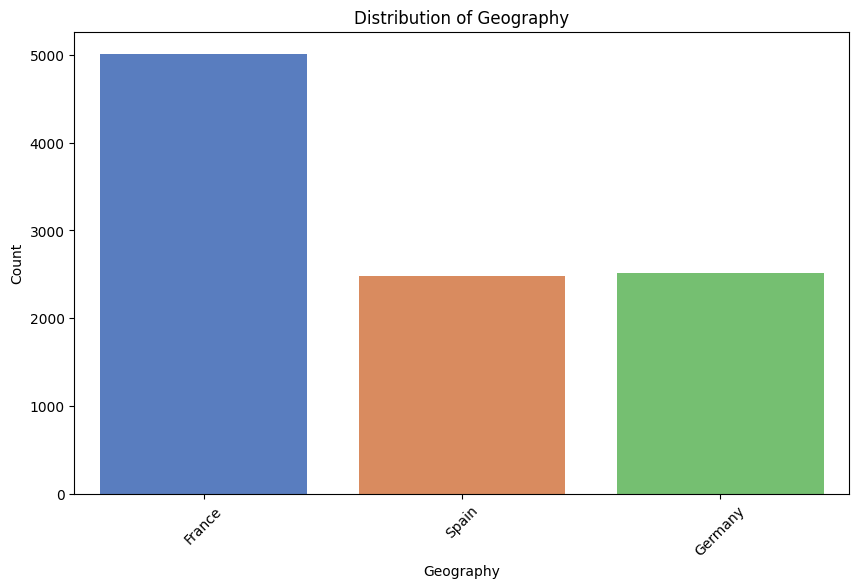

d:\ZenML Basics\churn_prediction_system\analysis\analyze_src\univariate_analysis.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


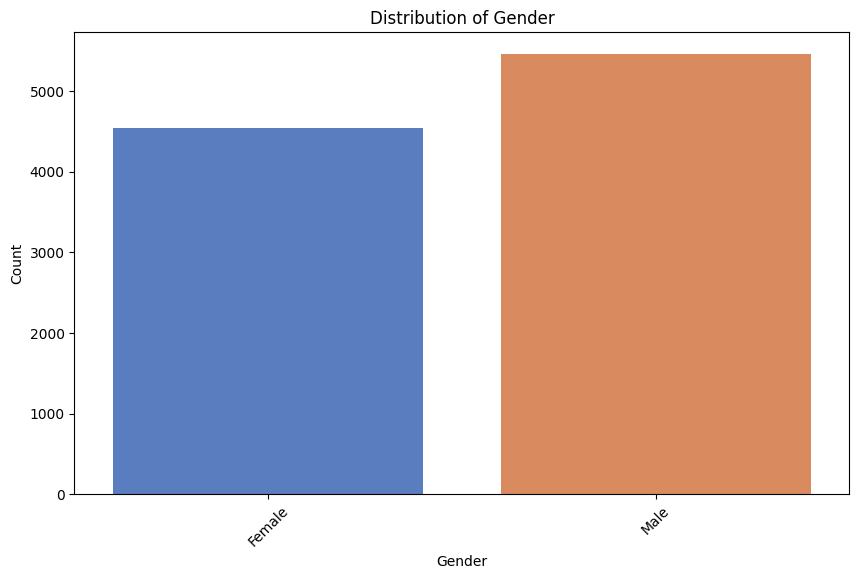

d:\ZenML Basics\churn_prediction_system\analysis\analyze_src\univariate_analysis.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


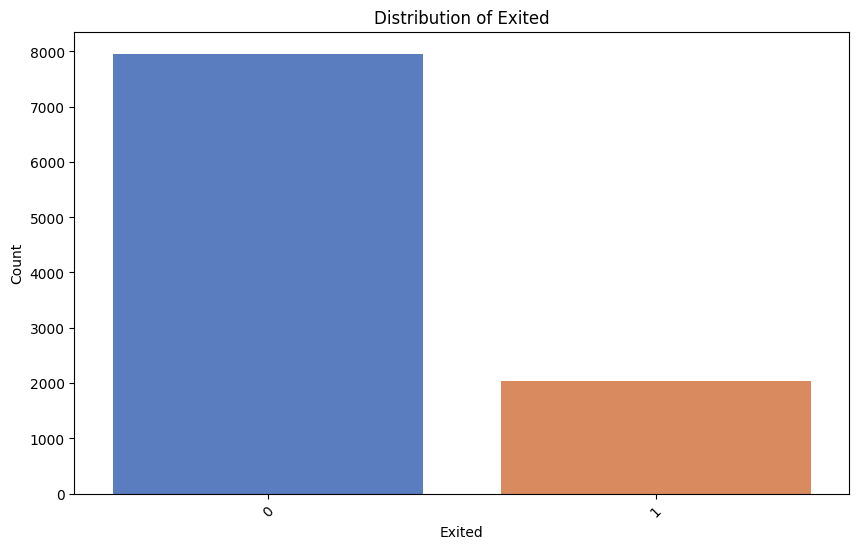

In [11]:
# List of categorical columns to analyze
cat_columns_to_univariate = ['Geography', 'Gender', 'Exited']

for column in cat_columns_to_univariate:
    # Initialize the UnivariateAnalyzer with the CategoricalUnivariateAnalysis strategy
    univariate_analyzer = UnivariateAnalyzer(CategoricalUnivariateAnalysis())
    # Execute univariate analysis for the specified column
    univariate_analyzer.execute_analysis(df, column)

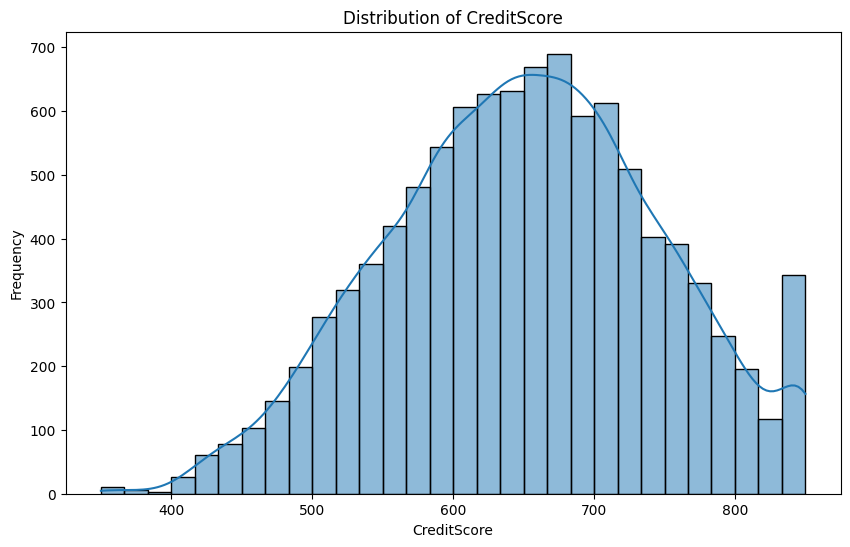

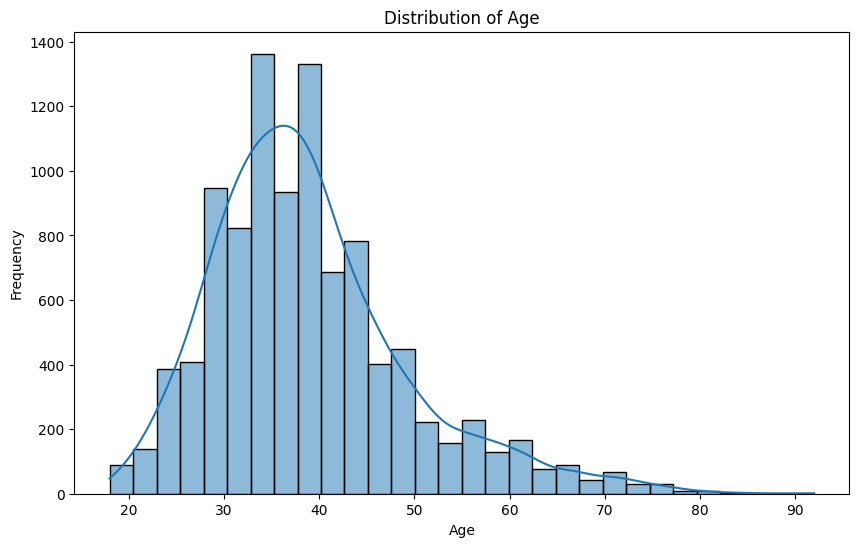

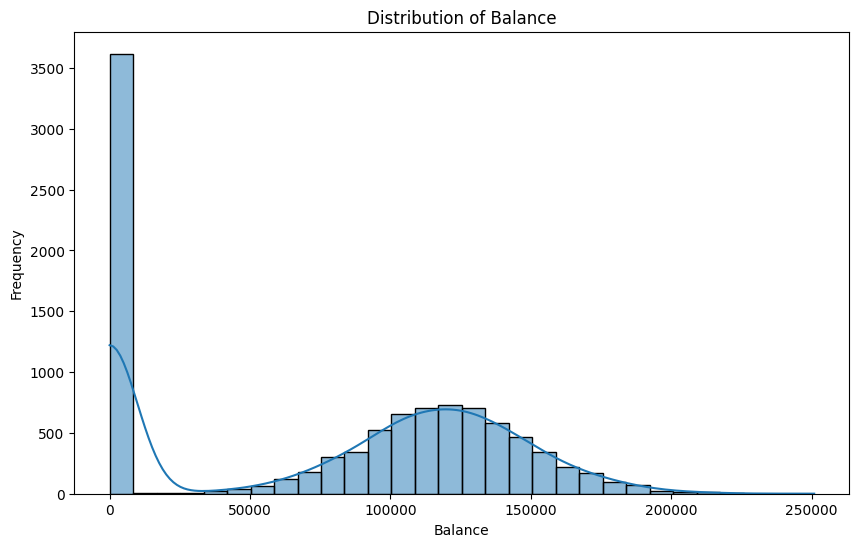

In [12]:
# List of numerical columns to analyze
num_column_to_univariate = ['CreditScore', 'Age', 'Balance']

for column in num_column_to_univariate:
    # Initialize the UnivariateAnalyzer with the NumericalUnivariateAnalysis strategy
    univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
    # Execute univariate analysis for the specified column
    univariate_analyzer.execute_analysis(df, column)

### Value Count for Categorical Columns

In [13]:
# Example list of categorical columns to analyze
cat_columns_for_value_counts = ['Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts', 
                         'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 
                         'Satisfaction Score', 'Card Type']

# Iterate through the columns and display unique value counts
for column in cat_columns_for_value_counts:
    print(f"\nColumn: {column}")
    print(df[column].value_counts())



Column: Geography
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Column: Gender
Gender
Male      5457
Female    4543
Name: count, dtype: int64

Column: Tenure
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

Column: Balance
Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

Column: NumOfProducts
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Column: HasCrCard
HasCrCard
1    7055
0    2945
Name: count, dtype: int64

Column: IsActiveMember
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

Column: Exited
Exited
0    7962
1    2038
Name: count, dtype: int64

Column: Complain
Complain
0    7956
1    2044
Name: 

### Distribution of Numerical Columns

In [14]:
# Define a list of numerical columns for analysis
num_cols_for_distribution = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

# Generate descriptive statistics for the specified numerical columns in the DataFrame
# This includes count, mean, std (standard deviation), min, 25%, 50%, 75%, and max values
df[num_cols_for_distribution].describe()


,CreditScore,Age,Balance,EstimatedSalary,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881,606.515100
std,96.653299,10.487806,62397.405202,57510.492818,225.924839
min,350.000000,18.000000,0.000000,11.580000,119.000000
25%,584.000000,32.000000,0.000000,51002.110000,410.000000
50%,652.000000,37.000000,97198.540000,100193.915000,605.000000
75%,718.000000,44.000000,127644.240000,149388.247500,801.000000
max,850.000000,92.000000,250898.090000,199992.480000,1000.000000


### Summary of Univariate Analysis

| **Feature**            | **Key Insights**                                                                                     |
|------------------------|-----------------------------------------------------------------------------------------------------|
| **Geography**          | Majority from **France** (50.14%), followed by **Germany** (25.09%) and **Spain** (24.77%).          |
| **Gender**             | Slightly more **Males** (54.57%) than **Females** (45.43%).                                          |
| **Tenure**             | Most customers have **1-2 years** tenure. Few have **0 years** tenure (4.13%).                       |
| **CreditScore**        | Average credit score is **650.53**, with a range from **350** to **850**.                            |
| **Age**                | The average age is **38.92** years, with the majority between **32** and **44** years.               |
| **Balance**            | **36.17%** have a balance of **0**. Remaining balances vary widely, with a maximum of **$250,898**.  |
| **NumOfProducts**      | Majority have **1** product (50.84%) or **2** products (45.90%). Few have **3-4** products.          |
| **HasCrCard**          | **70.55%** have a **credit card**.                                                                  |
| **IsActiveMember**     | **51.51%** are active members; **48.49%** are inactive.                                              |
| **Exited**             | **20.38%** churned, **79.62%** stayed.                                                              |
| **Complain**           | **20.44%** filed complaints.                                                                        |
| **Satisfaction Score** | Scores are fairly evenly distributed, with **Score 3** being most common (20.42%).                   |
| **Card Type**          | **DIAMOND** (25.07%) is the most common card type, followed by **GOLD**, **SILVER**, and **PLATINUM**.|

### General Insights
- **Geography**: France dominates the customer base.
- **Balance**: A high proportion of customers have zero balance, indicating possible inactivity.
- **NumOfProducts**: Most customers only have one product, signaling potential for cross-selling opportunities.
- **Complaints**: One-fifth of customers have raised complaints, an important metric for churn risk.


## Bivariate Analysis

### Numerical vs Numerical Visualization

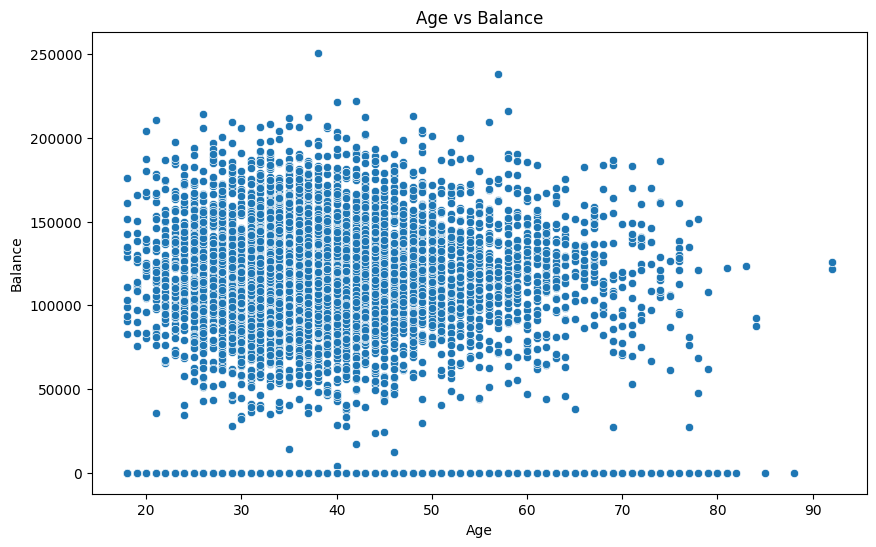

In [16]:
# Create an instance of the BivariateAnalyzer using a strategy for analyzing numerical vs numerical features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())

# Execute the bivariate analysis for the features 'Age' and 'Balance'
bivariate_analyzer.execute_analysis(df, 'Age', 'Balance')

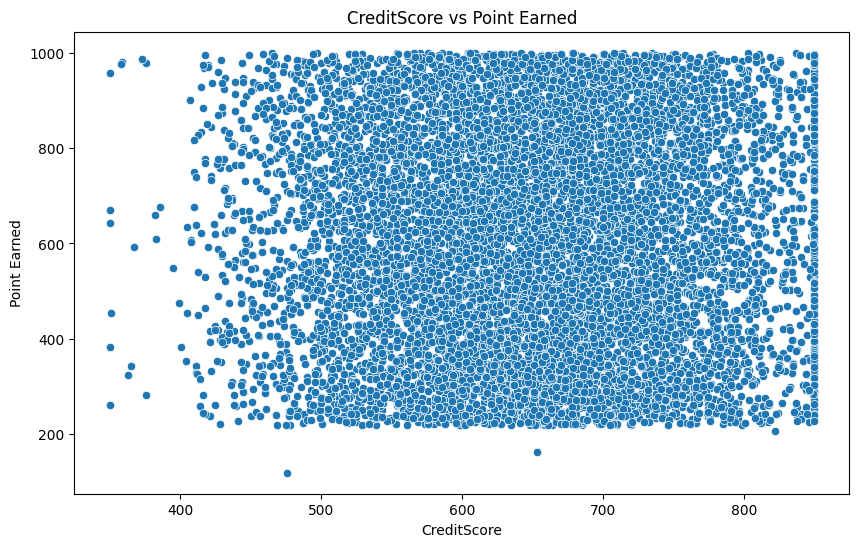

In [17]:
# Create an instance of the BivariateAnalyzer using a strategy for analyzing numerical vs numerical features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())

# Execute the bivariate analysis for the features 'CreditScore' and 'Point Earned'
bivariate_analyzer.execute_analysis(df, 'CreditScore', 'Point Earned')

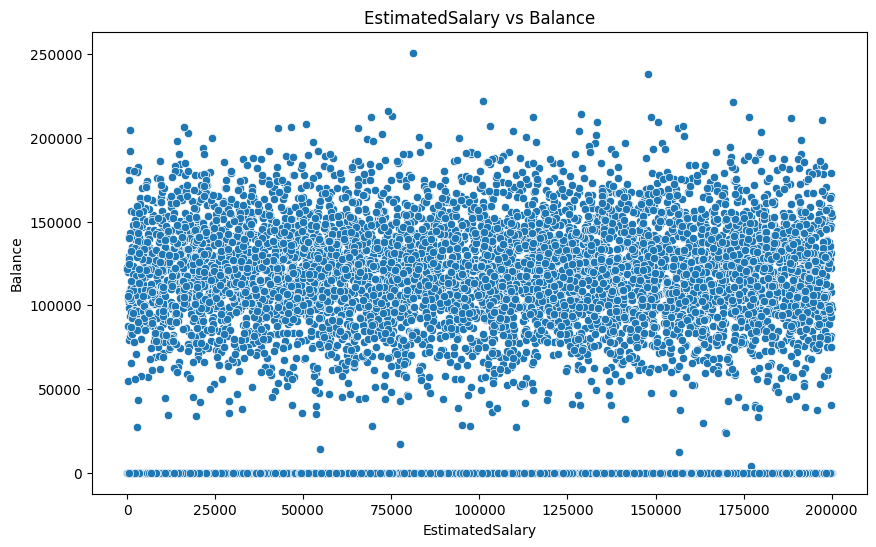

In [18]:
# Create an instance of the BivariateAnalyzer using a strategy for analyzing numerical vs numerical features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())

# Execute the bivariate analysis for the features 'EstimatedSalary' and 'Balance'
bivariate_analyzer.execute_analysis(df, 'EstimatedSalary', 'Balance')

### Categorical vs Numerical Visualization

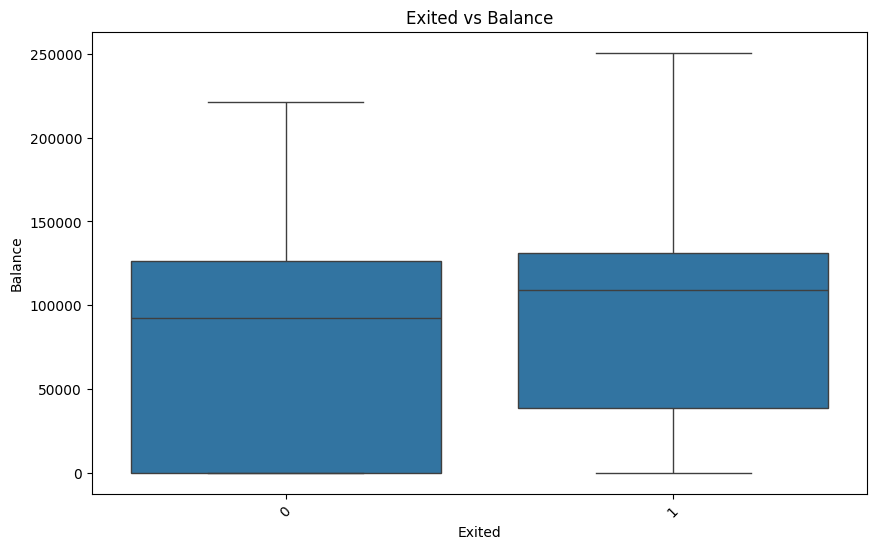

In [19]:
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Exited', 'Balance')

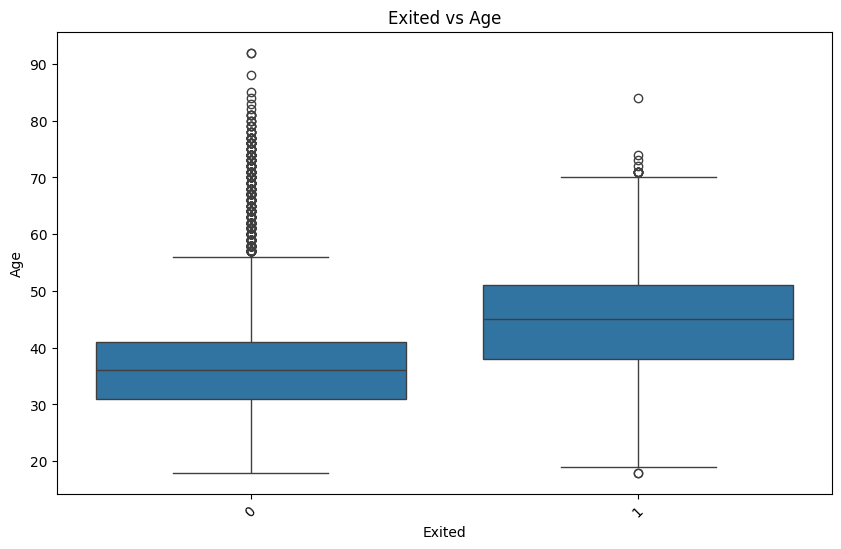

In [20]:
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Exited', 'Age')

### Categorical vs Categorical Visualization

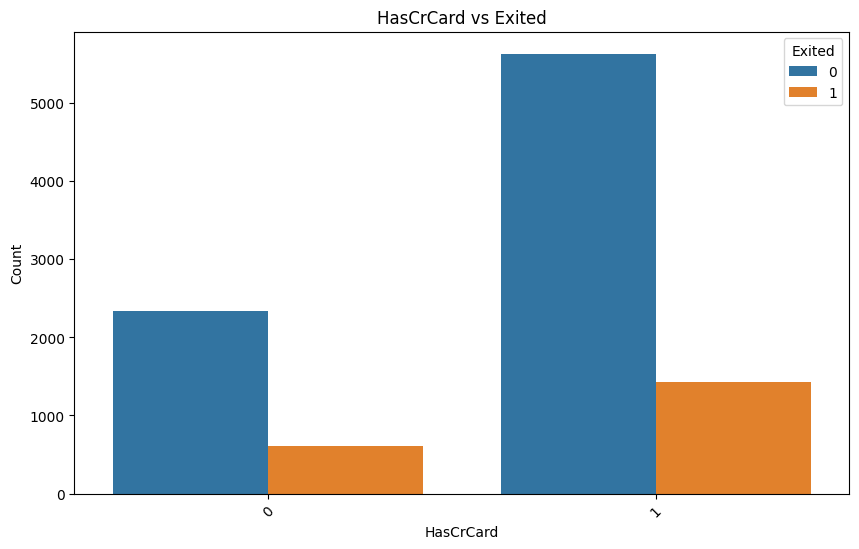

In [21]:
bivariate_analyzer = BivariateAnalyzer(CategoricalVsCategoricalAnalysis())
bivariate_analyzer.execute_analysis(df, 'HasCrCard', 'Exited')

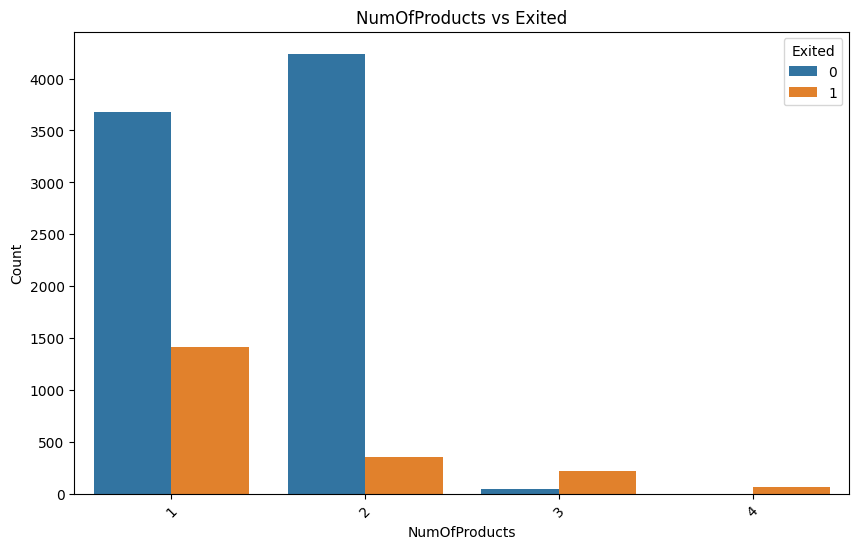

In [22]:
bivariate_analyzer = BivariateAnalyzer(CategoricalVsCategoricalAnalysis())
bivariate_analyzer.execute_analysis(df, 'NumOfProducts', 'Exited')

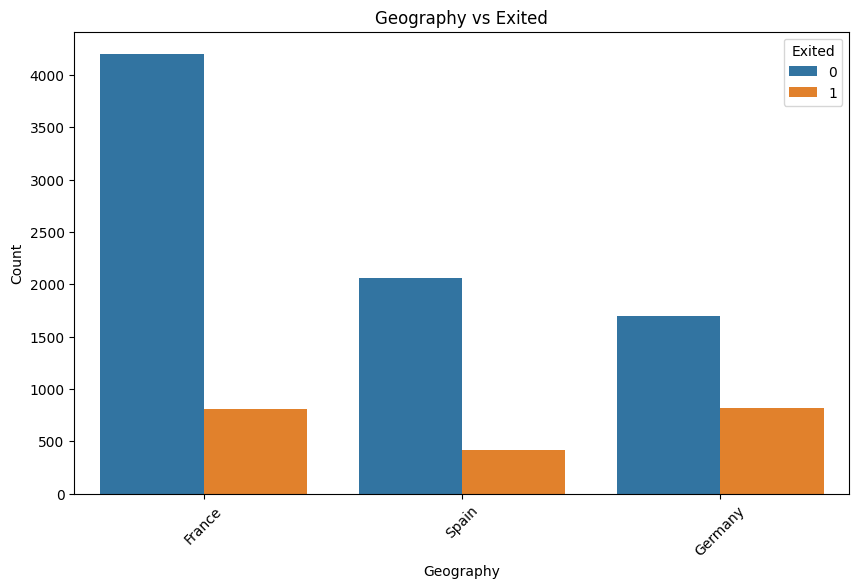

In [23]:
bivariate_analyzer = BivariateAnalyzer(CategoricalVsCategoricalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Geography', 'Exited')

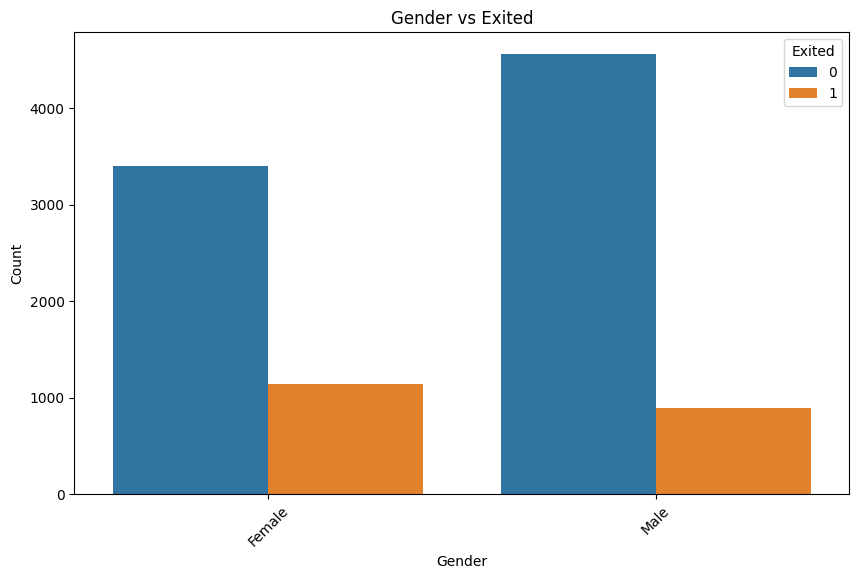

In [24]:
bivariate_analyzer = BivariateAnalyzer(CategoricalVsCategoricalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Gender', 'Exited')

### Summary of Bivariate Analysis

**Numerical vs. Numerical:**
- Individuals with higher account balances are generally between the ages of **20 and 55**. This suggests that working-age individuals tend to accumulate higher balances compared to younger or older customers.
- Other numerical comparisons show a well-distributed relationship across the features.

**Categorical vs. Numerical:**
- **Customers with higher balances** are more likely to churn, indicating a possible dissatisfaction among wealthier customers.
- **Customers aged 30-50** show a higher tendency to churn compared to other age groups, highlighting a potential group at risk.

**Categorical vs. Categorical:**
- Customers with **more than 2 products** have the highest churn rate, suggesting that cross-selling efforts might need reconsideration.
- **Germany** exhibits the highest churn rate, indicating regional differences in customer loyalty.
- **Females** show a higher likelihood of churn compared to males, hinting at potential gender-based differences in customer behavior.


## Multivariate Analysis

### Multivariate Visualization

In [25]:
# We need only attrinutes with numerical values
numerical_df = df.select_dtypes(include=['number'])

# Calcuulating the correlation matrix
correlation_matrix = numerical_df.corr()

target_variable = 'Exited'

correlations = correlation_matrix[target_variable].drop(target_variable)

# Converting the series into a DataFrame with meaningful columns
correlations_df = correlations.reset_index()
correlations_df.columns = ['Attributes', 'Correlations']

correlations_df

,Attributes,Correlations
0,RowNumber,-0.016140
1,CustomerId,-0.006203
2,CreditScore,-0.026771
3,Age,0.285296
4,Tenure,-0.013656
5,Balance,0.118577
6,NumOfProducts,-0.047611
7,HasCrCard,-0.006976
8,IsActiveMember,-0.156356
9,EstimatedSalary,0.012490


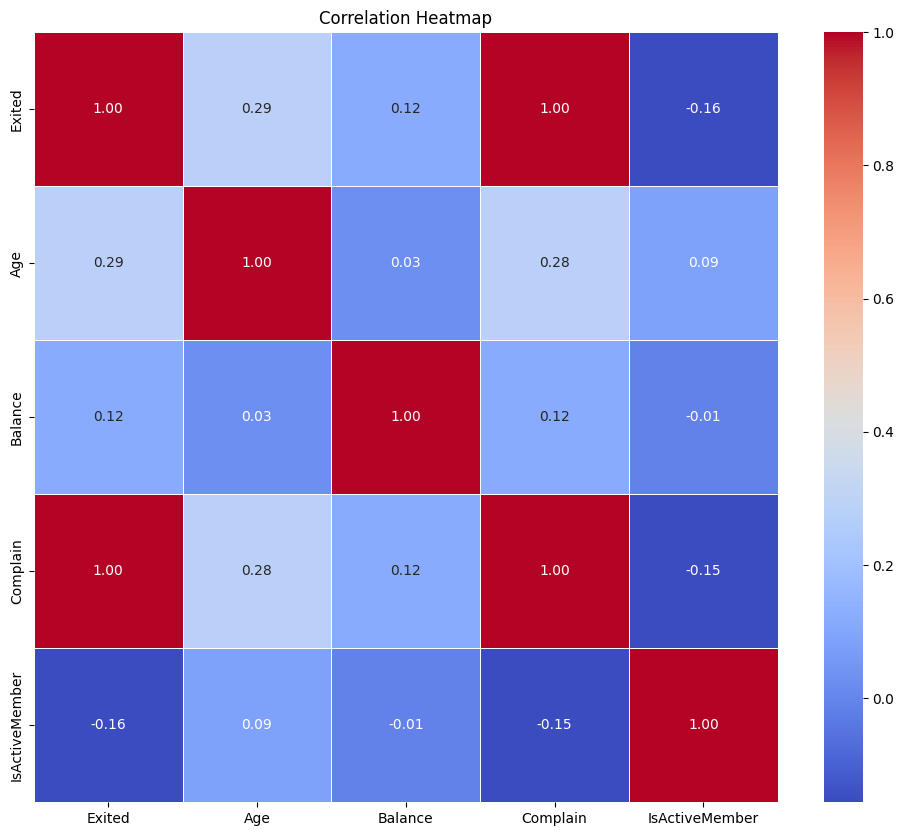

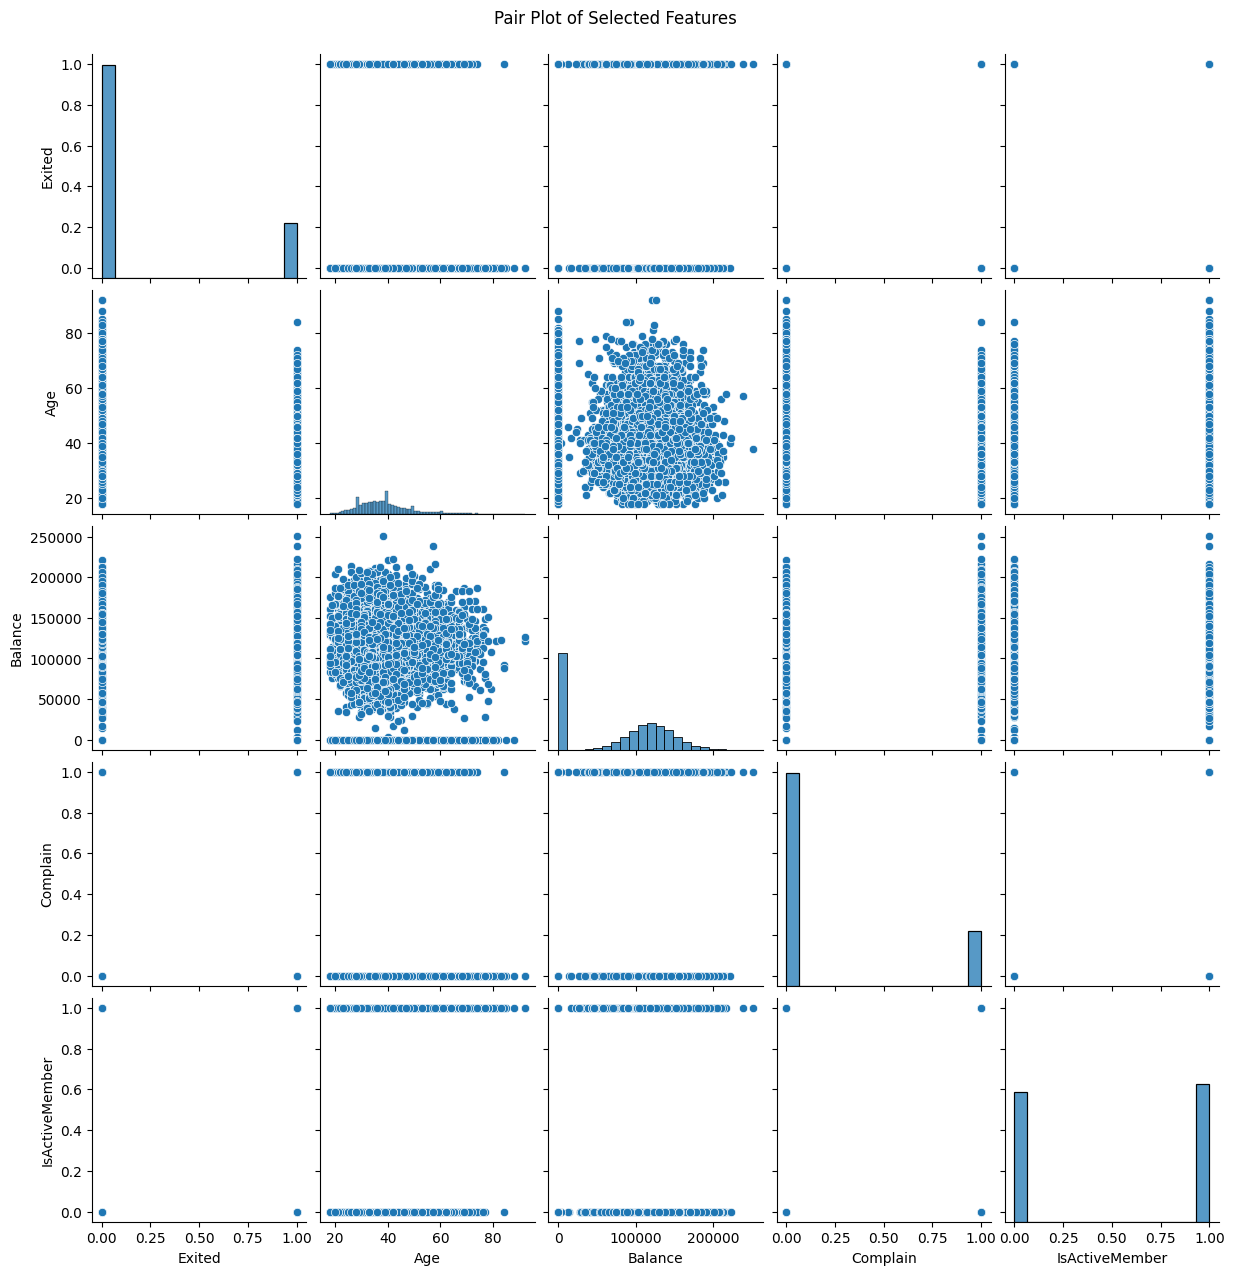

In [26]:
# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df[['Exited', 'Age', 'Balance', 'Complain', 'IsActiveMember']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)

### Multivariate Analysis Summary

The table below highlights the correlation values between different attributes and the target variable **Churn**. Positive values indicate a positive relationship, while negative values indicate a negative relationship. The absolute value of the correlation indicates the strength of the relationship:

| **Attribute**           | **Correlation with Churn** | **Interpretation**                                                                 |
|-------------------------|---------------------------|-----------------------------------------------------------------------------------|
| **RowNumber**           | -0.016                    | No significant impact; purely an identifier.                                      |
| **CustomerId**          | -0.006                    | Insignificant impact; serves as a unique identifier.                              |
| **CreditScore**         | -0.027                    | Very weak negative correlation, indicating almost no impact.                      |
| **Age**                 | 0.285                     | Strong positive correlation; older customers are more likely to churn.            |
| **Tenure**              | -0.014                    | Minimal correlation; tenure does not significantly influence churn.               |
| **Balance**             | 0.119                     | Weak positive correlation; customers with higher balances may churn more.         |
| **NumOfProducts**       | -0.048                    | Slight negative correlation; more products slightly reduce the likelihood of churn.|
| **HasCrCard**           | -0.007                    | Negligible correlation; having a credit card has little to no effect on churn.     |
| **IsActiveMember**      | -0.156                    | Moderate negative correlation; active members are less likely to churn.           |
| **EstimatedSalary**     | 0.012                     | Minimal correlation; salary has almost no impact on churn.                        |
| **Complain**            | 0.996                     | Very strong positive correlation; complaints are closely tied to churn.           |
| **Satisfaction Score**  | -0.006                    | Negligible negative correlation; satisfaction score has little effect on churn.   |
| **Point Earned**        | -0.005                    | Insignificant correlation; points earned have no direct impact on churn.          |

### Key Insights
- **Age** shows a strong positive correlation, indicating older customers are at a higher risk of leaving.
- **Complain** has an almost perfect positive correlation, highlighting the significant influence of unresolved complaints on customer churn.
- **IsActiveMember** has a moderate negative correlation, suggesting active members tend to stay with the bank.


## Final Insights and Actions

Based on the comprehensive analysis of the **Bank Customer Churn** dataset, several significant insights and actions have been identified:

1. **Churn Risk Factors**:
   - **Age and Churn**: Customers aged **30 to 50** show a higher tendency to churn. This demographic should be targeted for **retention strategies** like personalized offers and loyalty programs to reduce churn.
   - **Account Balance**: Many customers have a **zero balance**, but those with higher balances tend to remain with the bank. Encouraging customers to maintain higher balances or offering incentives for higher balances could reduce churn.

2. **Importance of Customer Activity**:
   - **Active Members**: Customers who are more **active** show a lower likelihood of churn. Increasing customer engagement through regular communication and incentives for activity will help retain these members.

3. **Complaints and Churn**:
   - **Complaint Correlation**: The data shows that customers who have lodged **complaints** are highly likely to churn (**correlation = 0.995**). Implementing efficient complaint resolution and enhancing customer support could drastically reduce churn rates.

4. **Product Diversification**:
   - **Number of Products**: Customers with **more than two products** tend to churn more. Encouraging customers to diversify their product usage through cross-selling will strengthen their relationship with the bank and reduce churn risk.

5. **Geographical Differences**:
   - **Regional Influence**: Customers from **France** form the majority, but **German customers** exhibit a higher churn rate. Customizing marketing and service strategies based on geography, particularly focusing on German customers, could mitigate churn in this region.

6. **Satisfaction Scores**:
   - **Customer Feedback**: Low **Satisfaction Scores** are linked with higher churn risk. Implementing feedback loops and acting on customer concerns can significantly lower churn.

7. **Credit Score Impact**:
   - **Credit Score and Churn**: Higher **credit scores** correlate with lower churn rates. Offering financial guidance and support to customers with lower credit scores might encourage retention by improving their financial stability.

### Conclusion

The analysis indicates the need for targeted strategies to retain customers, particularly focusing on high-risk segments like middle-aged customers and those with complaints. Increasing customer engagement, promoting product diversification, and resolving complaints swiftly will be crucial to reducing churn. Additionally, region-specific approaches, particularly for German customers, and monitoring satisfaction scores can lead to a more loyal customer base and improved retention.
